In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = plt.imread('/content/drive/MyDrive/images/Voldi.jpg')
num_down = 2 # number of downsampling steps
num_bilateral = 7 # number of bilateral filtering steps
w, h, _ = img.shape

In [ ]:
img_color = np.copy(img)
for _ in range(num_down):
 img_color = cv2.pyrDown(img_color)

In [ ]:
for _ in range(num_bilateral):
 img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=0.1,
sigmaSpace=0.01)


In [ ]:
for _ in range(num_down):
 img_color = cv2.pyrUp(img_color)

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)

In [ ]:
img_edge = cv2.adaptiveThreshold((255*img_blur).astype(np.uint8), \
 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, \
 blockSize=9, C=2)


In [ ]:
# Jika img_edge memiliki 3 channel, konversi ke grayscale terlebih dahulu
if len(img_edge.shape) == 3 and img_edge.shape[2] == 3:
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_BGR2GRAY)

# Konversi ke RGB menggunakan cv2.COLOR_GRAY2BGR
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2BGR)
img_edge = cv2.resize(img_edge, (img_color.shape[1], img_color.shape[0]))
img_color = img_color.astype(np.uint8)
img_cartoon = cv2.bitwise_and(img_color, img_edge)


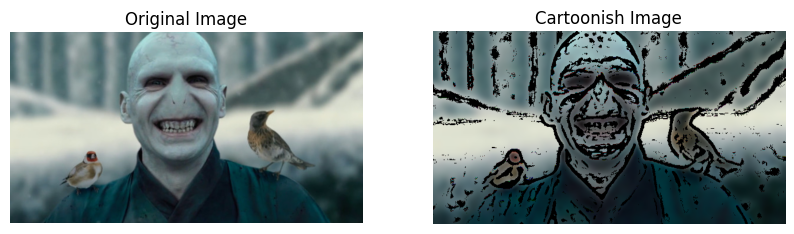

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img)  # Original image
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(img_cartoon)  # Cartoonized image
ax2.set_title('Cartoonish Image')
ax2.axis('off')

plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 19.2 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.5.2-cp310-cp310-linux_x86_64.whl size=762839 sha256=87f6f93e3988cf59c7a46a31a900fdd02721d4f380bb017a2856641a65f85f69
  Stored in directory: /root/.cache/pip/wheels/a1/b8/63/bdf557940ec60d1b8822e73ff9fbe7727ac19f009d46b5d175
Successfully built medpy


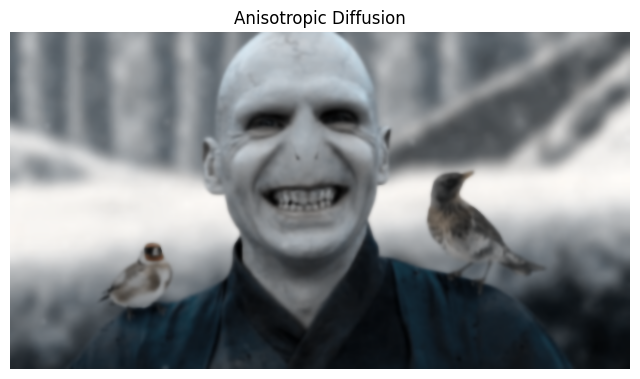

In [ ]:
from IPython import get_ipython
from IPython.display import display

import cv2
import numpy as np
import matplotlib.pylab as plt

img = plt.imread("/content/drive/MyDrive/images/Voldi.jpg")
num_down = 2
num_bilateral = 7
w, h, _ = img.shape

img_color = np.copy(img)
for _ in range(num_down):
    img_color = cv2.pyrDown(img_color)

for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=0.1,
                                   sigmaSpace=0.01)

for _ in range(num_down):
    img_color = cv2.pyrUp(img_color)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)

img_edge = cv2.adaptiveThreshold((255*img_blur).astype(np.uint8), \
255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, \
blockSize=9, C=2)

if len(img_edge.shape) == 2:
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)

img_color = cv2.resize(img_color, (img_edge.shape[1], img_edge.shape[0]))

img_cartoon = cv2.bitwise_and(img_color, img_edge)

!pip install medpy
from medpy.filter.smoothing import anisotropic_diffusion

img_anisotropic = anisotropic_diffusion(img, niter=10, kappa=50, gamma=0.1, option=2)

img_anisotropic = (img_anisotropic - np.min(img_anisotropic)) / (np.max(img_anisotropic) - np.min(img_anisotropic))
img_anisotropic = (img_anisotropic * 255).astype(np.uint8)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img_anisotropic, cmap='gray')
ax.set_title('Anisotropic Diffusion')
ax.axis('off')

plt.show()